<a href="https://colab.research.google.com/github/ronron88882/Basic-python/blob/test/Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

In [2]:
#(1)
x = np.arange(0, 5, 5/100)

noise = np.random.standard_normal(100)

In [3]:
def y(x):
    """真の関数"""
    return 3 - 5 * x + x ** 2

In [4]:
#(2)
t = y(x)+noise

In [5]:
t.shape

(100,)

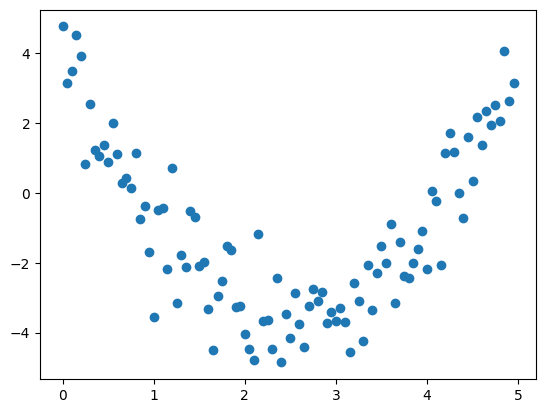

In [6]:
plt.scatter(x, t)

In [11]:
#(3)
x0 = np.ones_like(x)
x1 = x ** 1
x2 = x ** 2
X = np.vstack([x0, x1, x2]).T

In [12]:
x2.shape

(100,)

In [13]:
#(4)
w0,w1,w2 = np.linalg.inv(X.T @ X) @ X.T @ t
pred_y = w0 + w1 * x + w2 * x ** 2